# SERIE TEMPORAL PARA CALCULO DE PASAJEROS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# ESCALAMOS LA DATA

In [4]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df['#Passengers'].values.reshape(-1,1))

# CREAMOS SECUENCIAS

In [5]:
# Crear secuencias para la serie temporal
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [6]:
seq_length = 12  # Usar 12 meses como ventana de entrada
X, y = create_sequences(data, seq_length)

# DIVIDIMOS EN ENTRENAMIENTO Y PRUEBA

In [7]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CREAMOS RED NEURONAL LSTM

In [8]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation="relu"),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', loss='mse')

# ENTRENAMOS LA RED NEURONAL

In [10]:
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.2045 - val_loss: 0.1201
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1304 - val_loss: 0.0774
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0694 - val_loss: 0.0287
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0266 - val_loss: 0.0176
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0276 - val_loss: 0.0275
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0293 - val_loss: 0.0118
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0133 - val_loss: 0.0158
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0195 - val_loss: 0.0162
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0198 - val_loss: 0.0113
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0116 - val_loss: 0.0097
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0123 - val_loss: 0.0111
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0160 - val_l

# Gráfica del resultado

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


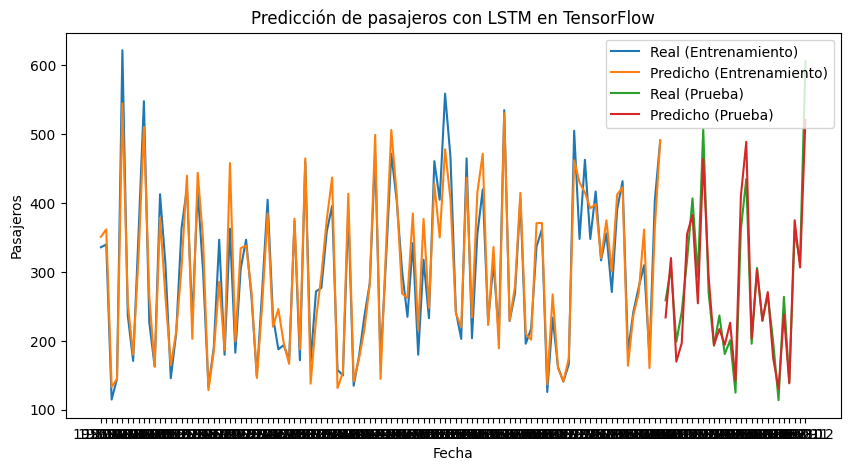

In [11]:
# Realizar predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
split = int(len(X) * 0.8)
# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(df["Month"][seq_length:split+seq_length], scaler.inverse_transform(y_train), label="Real (Entrenamiento)")
plt.plot(df["Month"][seq_length:split+seq_length], scaler.inverse_transform(y_pred_train), label="Predicho (Entrenamiento)")
plt.plot(df["Month"][split+seq_length:], scaler.inverse_transform(y_test), label="Real (Prueba)")
plt.plot(df["Month"][split+seq_length:], scaler.inverse_transform(y_pred_test), label="Predicho (Prueba)")
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.title("Predicción de pasajeros con LSTM en TensorFlow")
plt.show()